In [1]:
import pandas as pd 
import numpy as np
import os
from os.path import join

In [2]:
hot_dog_img_dir = './input/hot-dog-not-hot-dog/seefood/train/hot_dog'

# Get all file names in the hot dog directory and store it in an array 
hot_dog_files = os.listdir(hot_dog_img_dir)
# Get full path for all the files in the hot dog directory . This can be done by joining the folder path + filename

hot_dog_paths = [join(hot_dog_img_dir,filename) for filename in hot_dog_files]
# Get all file names in the not hot dog directory and store it in an array 

not_hot_dog_img_dir = './input/hot-dog-not-hot-dog/seefood/train/not_hot_dog'
not_hot_dog_files = os.listdir(not_hot_dog_img_dir)
# Get full path for all the files in the hot dog directory . This can be done by joining the folder path + filename
not_hot_dog_paths = [join(not_hot_dog_img_dir,filename) for filename in not_hot_dog_files]

# Join both the list of paths 
img_paths = hot_dog_paths + not_hot_dog_paths

In [3]:
from IPython.display import Image,display
from keras.applications.resnet50 import decode_predictions
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
image_size = 224


Using TensorFlow backend.


In [4]:
def read_prep_img(img_paths,img_height=image_size,img_width=image_size):
#     Load all the images in the given path and resize them into the specified image_size
    imgs = [load_img(img_path,target_size=(img_height,img_width)) for img_path in img_paths]
#     Convert all the images into an array and store it into an img_array
    img_array = np.array([img_to_array(img) for img in imgs])
#     Use resnet50 preprocess_input function to preprocess the img_array
    output = preprocess_input(img_array)
    return output



In [5]:
# fit the weights of the already trained model 

resnet_model = ResNet50(weights='./input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
# prepare the test data 
test_data = read_prep_img(img_paths)
# predict the labels for the test data
preds = resnet_model.predict(test_data)

# use resnet50's decode_prediction function to decode the labels of the predictions.
most_likely_labels = decode_predictions(preds,top=3)

In [6]:
# most_likely_labels

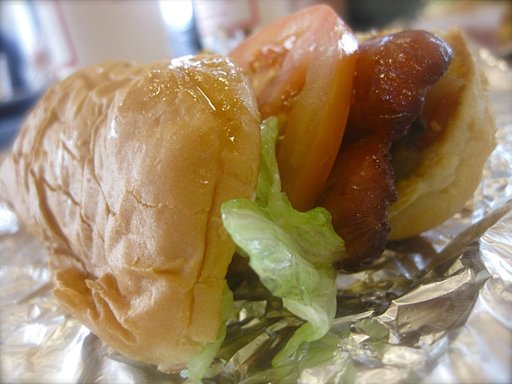

[('n07697537', 'hotdog', 0.35457045), ('n07697313', 'cheeseburger', 0.28973356), ('n07754684', 'jackfruit', 0.07787275)]


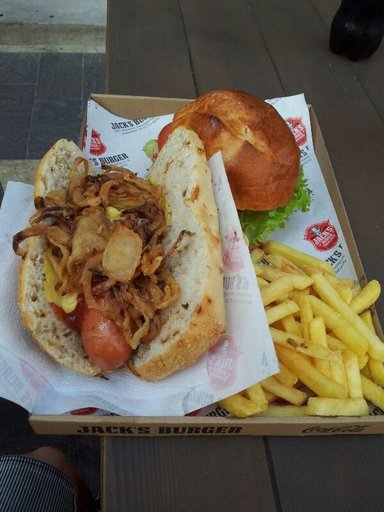

[('n07697537', 'hotdog', 0.837198), ('n01978287', 'Dungeness_crab', 0.05851056), ('n07684084', 'French_loaf', 0.027484063)]


In [7]:

# have a look at some of the data and the result of the predictions

count=0
for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])
    count+=1
    if count==2 :
        break

In [8]:
# return true of false for an img based on whether it is an hot-dog or not 

def is_hot_dog(preds):
    '''
    inputs:
    preds_array:  array of predictions from pre-trained model

    outputs:
    is_hot_dog_list: a list indicating which predictions show hotdog as the most likely label
    '''
    result=[]
    decoded = decode_predictions(preds, top=1)
    for i in range(len(decoded)) :
        if(decoded[i][0][1] == 'hotdog'):
            result.append(True)
        else:
            result.append(False)
    return result

In [10]:
# calculate the accuracy of our model based on the correct predictions

def calc_accuracy(model, paths_to_hotdog_images, paths_to_other_images):
    num_of_hotdogs_images = len(paths_to_hotdog_images)
    num_of_other_images = len(paths_to_other_images)
    
    hotdog_image_data = read_prep_img(paths_to_hotdog_images)
    preds_for_hotdogs = model.predict(hotdog_image_data)
    num_correct_hotdog_preds = sum(is_hot_dog(preds_for_hotdogs))
    
    other_image_data = read_prep_img(paths_to_other_images)
    preds_for_others = model.predict(other_image_data)
    num_correct_other_preds = num_of_other_images-sum(is_hot_dog(preds_for_others))

    return (num_correct_hotdog_preds+num_correct_other_preds)/(num_of_hotdogs_images+num_of_other_images)
    
# Code to call calc_accuracy.  my_model, hot_dog_paths and not_hot_dog_paths were created in the setup code
my_model_accuracy = calc_accuracy(resnet_model, hot_dog_paths, not_hot_dog_paths)
print("Accuracy of the ResNet50 model is : {}".format(my_model_accuracy))

Accuracy of the ResNet50 model is : 0.8473895582329317


In [ ]:
# VGG16 model

In [11]:
# run the same process for a different model namely VGG16 and initialize it with the already trained model weights.
from tensorflow.keras.applications import VGG16

vgg16_model = VGG16(weights='./input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5')
test_data = read_prep_img(img_paths)
preds = resnet_model.predict(test_data)
most_likely_labels = decode_predictions(preds,top=3)

In [12]:
my_model_accuracy = calc_accuracy(vgg16_model, hot_dog_paths, not_hot_dog_paths)
print("Accuracy of the VGG16 model is : {}".format(my_model_accuracy))

Accuracy of the VGG16 model is : 0.8393574297188755
